<a href="https://colab.research.google.com/github/czambrano26/MAT-421/blob/main/ModuleH_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Section 22.4: Numerical Error and Instability

---
Accuracy refers to a scheme's ability to get close to the exact solution (usually unknown) as a function of the step size h. 

Stability refers to a scheme's ability to keep the error from growing as it integrates forward in time. If the error does not grow, then the scheme is stable. 

Ex. Use the Euler Explicit, Euler Implicit, and Trapezoidal Formulas to solve the pendulum equation over the time interval [0, 5] in incremenets of 0.1 and for an initial solution of S_0 = [1 0]. For the model parameters using sqrt(g/l) = 5. Plot the approximate solution on a single graph. 

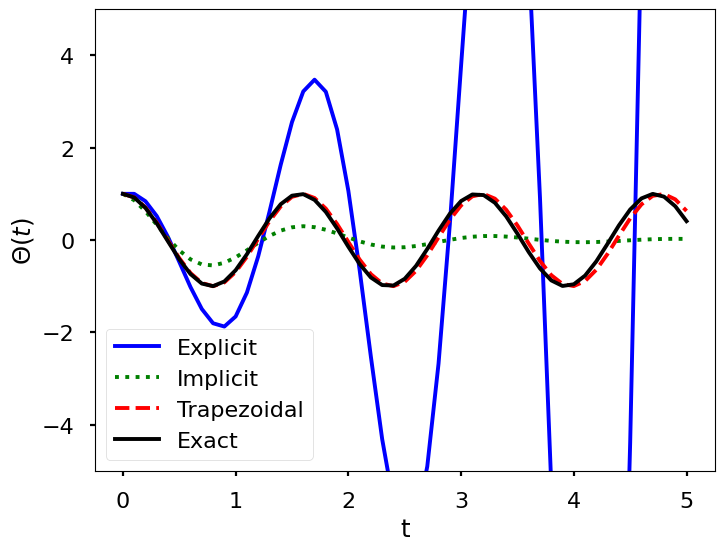

In [10]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

%matplotlib inline 

# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], 
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])
    
plt.figure(figsize = (8, 6))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-5, 5])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

The exact solution is the black cosine wave. The blue Explicit Euler scheme is unstable. The green implicit Euler scheme decays exponentially (not correct). The red trapezoidal scheme has a small phase shift but is a close solution.

Section 22.5: Predictor-Corrector and Runge Kutta Methods

---
Given any time and state value, the function F(t, S(t)) returns the change of state dS(t)/dt. Predictor-corrector methods improve the approximation accuracy of non-predictor-corrector methods. It does so by querying the F function several times at different locations, and then using a weightes average of the results. 

Runge Kutta methods are one of the most widely used methods for solving ODEs. The accuracy of numerical integration is greatly improved if more terms from the Taylor series are kept to approximate the numerical integration. 

The Fourth Order Runge Kutta method integrates ODEs with a high order of accuracy. It uses four points and the weighted average is used to produce the approximation of the solution. 

Section 22.6: Python ODE Solvers

---
There are several functions for solving initial value problems. The most common is the scipy.integrate.solve_ivp function.

Ex. Consider the ODE dS(t)/dt = cos(t) for an initial value S_0=0. The exact solution to this problem is S(t)=sin(t). Use solve_ivp to approximate the solution to this initial value problem over the interval [0, pi]. Plot the approximate solution versus the exact solution and the relative error over time. 

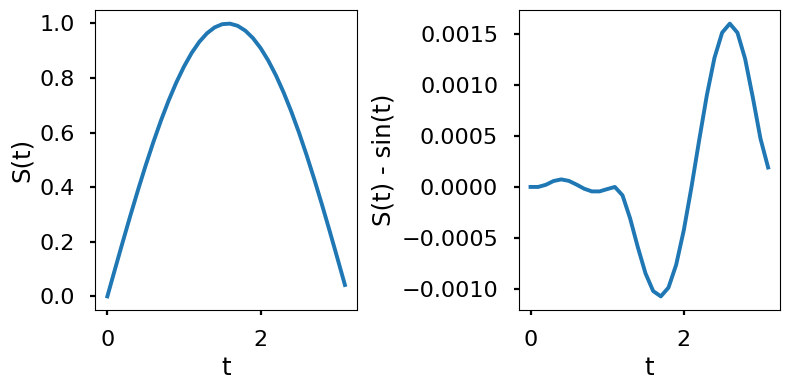

In [15]:
from scipy.integrate import solve_ivp

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (8, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

The left figure is the integration of cos(t) with solve_ivp. The figure on the right is the difference between the solve_ivp solution and the analytical solution. 

The relative and absolute tolerances can be controlled using the rtol and atol arguments. 

Ex. Use the rtol and atol arguments to make the difference between the two solutions less than 1e-7. 

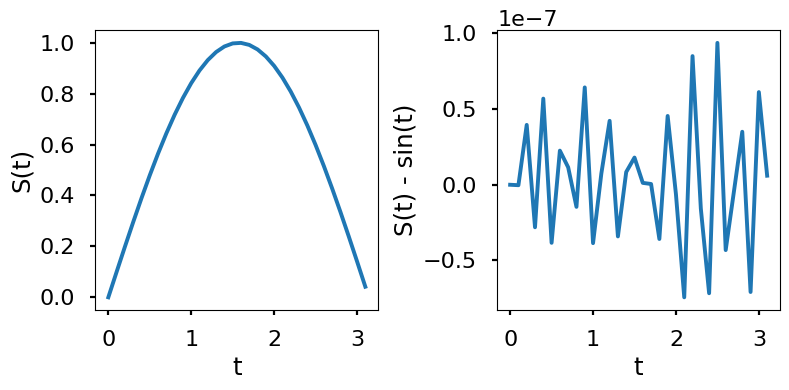

In [17]:
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, \
                rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (8, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()